In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from os.path import join, abspath
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

project_dir = abspath("../")

if project_dir not in sys.path:
    sys.path.append(project_dir)
    print("Added {} to path".format(project_dir))
    
from clustering.kmedoids import KMedoids

Added /home/igor/projects/ml_utils to path


In [2]:
from sklearn.datasets import make_blobs
import scipy.stats as ss
from scipy.spatial.distance import pdist, squareform

<IPython.core.display.Javascript object>


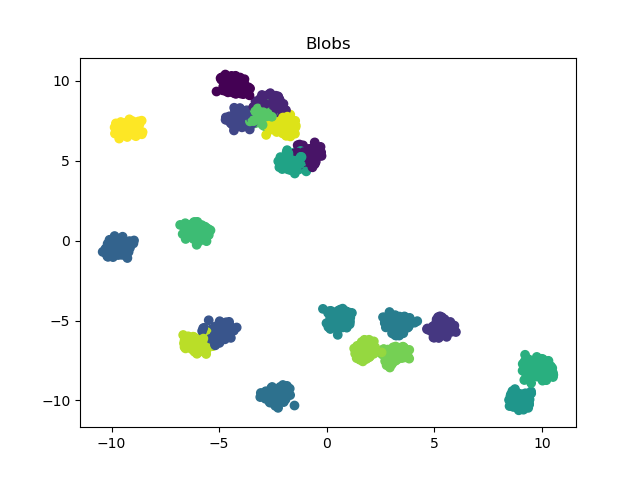

Text(0.5, 1.0, 'Blobs')

In [3]:
n_samples = 2000
n_blobs = 20
X, y = make_blobs(n_samples=n_samples, centers=n_blobs, cluster_std=0.3)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_title('Blobs')

dist_matrix:  (2000, 2000)


<IPython.core.display.Javascript object>


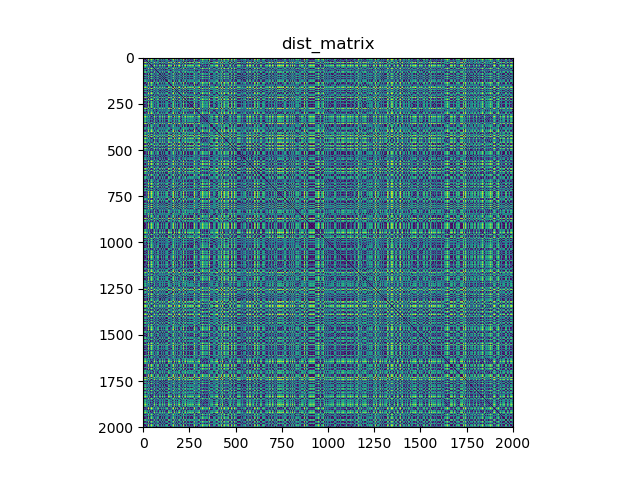

Text(0.5, 1.0, 'dist_matrix')

In [4]:
dist_matrix = squareform(pdist(X, metric='euclidean'))
print('dist_matrix: ', dist_matrix.shape)

fig, ax = plt.subplots()
ax.imshow(dist_matrix)
ax.set_title('dist_matrix')

Running k-Medoids with k = 20, init = k++
Medoids initialized:  [ 670  876 1831   10  461  917 1122 1520 1647   79   54 1833 1687   85
 1942 1609 1548  566 1702 1309]
Running iter 0
Running iter 1
Running iter 2
Running iter 3
Running iter 4


<IPython.core.display.Javascript object>


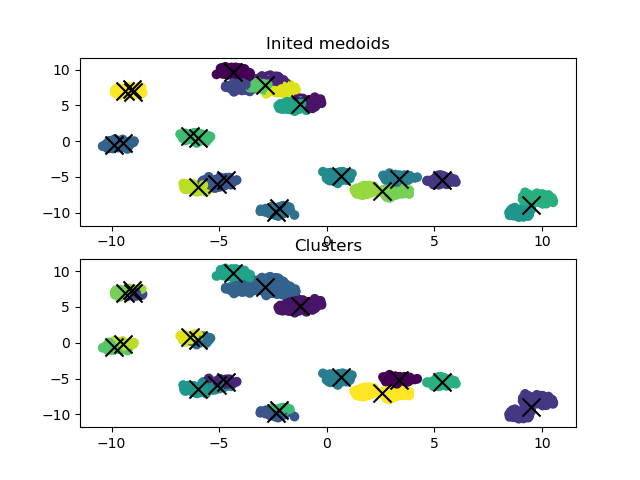

Clusters:  Counter({6: 396, 1: 203, 3: 200, 19: 200, 11: 101, 0: 100, 8: 100, 12: 100, 10: 96, 5: 68, 14: 60, 9: 56, 7: 50, 18: 50, 2: 48, 15: 41, 17: 40, 4: 40, 13: 32, 16: 19})


Text(0.5, 1.0, 'Clusters')

In [5]:
km = KMedoids(dist_matrix)

clusters, medians = km.cluster(k=n_blobs)

fig, ax = plt.subplots(2)
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].scatter(X[km.inited_medoids, 0], X[km.inited_medoids, 1],
            marker='x', s=169, linewidths=3, color='k')
ax[0].set_title('Inited medoids')

clusters = ss.rankdata(clusters, method='dense') - 1
from collections import Counter
c = Counter(clusters)

print('Clusters: ', c)
ax[1].scatter(X[:, 0], X[:, 1], c=clusters)
ax[1].scatter(X[medians, 0], X[medians, 1],
            marker='x', s=169, linewidths=3, color='k')
ax[1].set_title('Clusters')